# 實作至自來水公司讀取水表資訊

In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

水號 = '71051578510'

url = 'https://www.water.gov.tw/eservice/03online/counter0101_view.aspx'
formdata = {'siteno1':水號[0:2],
'userno1':水號[2:10],
'checkno1':水號[-1],
'KeepWaterno':'True'}
resp = requests.post(url, data=formdata)

tables = pd.read_html(resp.text)

tables[4]

,0,1,2,3,4,5,6,7,8,9,10,11
0,繳費年月,用水度數(不含分攤度數),合計度數(含分攤度數),應繳金額,實繳金額,銷帳日期,繳費狀況,代收日期,與去年比較增減度數,省水比例(含分攤度數),省水比例(不含分攤度數),查看
1,108/03,80度,80度,1591元,1591元,108/ 3/13,已繳,NaN,51度,-175.86%,-175.86%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
2,108/01,55度,55度,1073元,1073元,108/ 1/11,已繳,NaN,11度,-25.00%,-25.00%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
3,107/11,36度,37度,685元,685元,107/11/13,已繳,NaN,-3度,5.13%,7.69%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
4,107/09,21度,21度,374元,374元,107/ 9/13,已繳,NaN,-20度,50.00%,48.78%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
5,107/07,26度,26度,492元,492元,107/ 7/12,已繳,NaN,-26度,50.00%,50.00%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
6,107/05,15度,15度,266元,266元,107/ 5/11,已繳,NaN,-32度,68.09%,68.09%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
7,107/03,29度,29度,490元,490元,107/ 3/13,已繳,NaN,NaN,%,%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
8,107/01,44度,44度,863元,863元,107/ 1/11,已繳,NaN,NaN,%,%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"
9,106/11,39度,39度,769元,769元,106/11/13,已繳,NaN,NaN,%,%,"查看您的瀏覽器不支援JavaScript語法,但是並不影響您獲取本網站的內容"


# 將用水度數畫成圖表

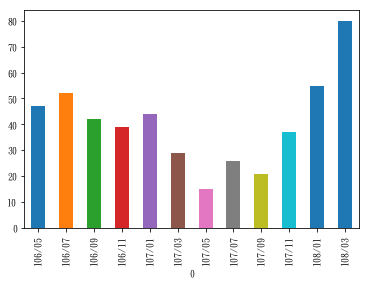

In [79]:
df4 = tables[4]
se = df4[2].str.replace("度","")

se = se[1:].astype(int)
se.index = df4[0][1:]

se = se.sort_index()

plt.rcParams['font.family']='DFKai-SB' #顯示中文 for Windows10
se.plot(kind='bar')
